# EDA on 4 Year Michigan College Tuition, Diversity, and Pay

# Imports

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

# Creating and Cleaning data for Dataframes

In [ ]:
school_diversity_df = pd.read_csv('diversity_school.csv')
salary_potential_df = pd.read_csv('salary_potential.csv')
tuition_cost_df = pd.read_csv('tuition_cost.csv')
tuition_income_df = pd.read_csv('tuition_income.csv')

In [ ]:
michgan_school_diversity_df = school_diversity_df.loc[(school_diversity_df['state'] == 'Michigan')].reset_index(drop=1)
michigan_salary_potential_df = salary_potential_df.loc[(salary_potential_df['state_name'] == 'Michigan')].reset_index(drop=1)
michigan_salary_potential_df = pd.merge(michigan_salary_potential_df, tuition_cost_df, how='left')
michigan_tuition_income_df = tuition_income_df.loc[(tuition_income_df['state'] == 'MI') & (tuition_income_df['year'] == 2018)].reset_index(drop=1)

michigan_salary_potential_df.drop(['state_name', 'state', 'state_code', 'degree_length', 'rank'], axis=1, inplace=True)


michgan_school_diversity_df = pd.merge(michgan_school_diversity_df, michigan_salary_potential_df, how='inner')
michgan_school_diversity_df.set_index(['name', 'category'], inplace=True)
michgan_school_diversity_df.drop(['early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total'], axis=1, inplace=True)

michigan_tuition_income_df = pd.merge(michigan_tuition_income_df, michigan_salary_potential_df, how='inner')
michigan_tuition_income_df.set_index(['name', 'income_lvl'], inplace=True)
michigan_tuition_income_df.drop(['early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent', 'room_and_board', 'in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total'], axis=1, inplace=True)

In [ ]:
michgan_school_diversity_df['Percent'] = michgan_school_diversity_df['enrollment']/michgan_school_diversity_df['total_enrollment'] * 100

# Graph of Cost of Colleges by Income Level

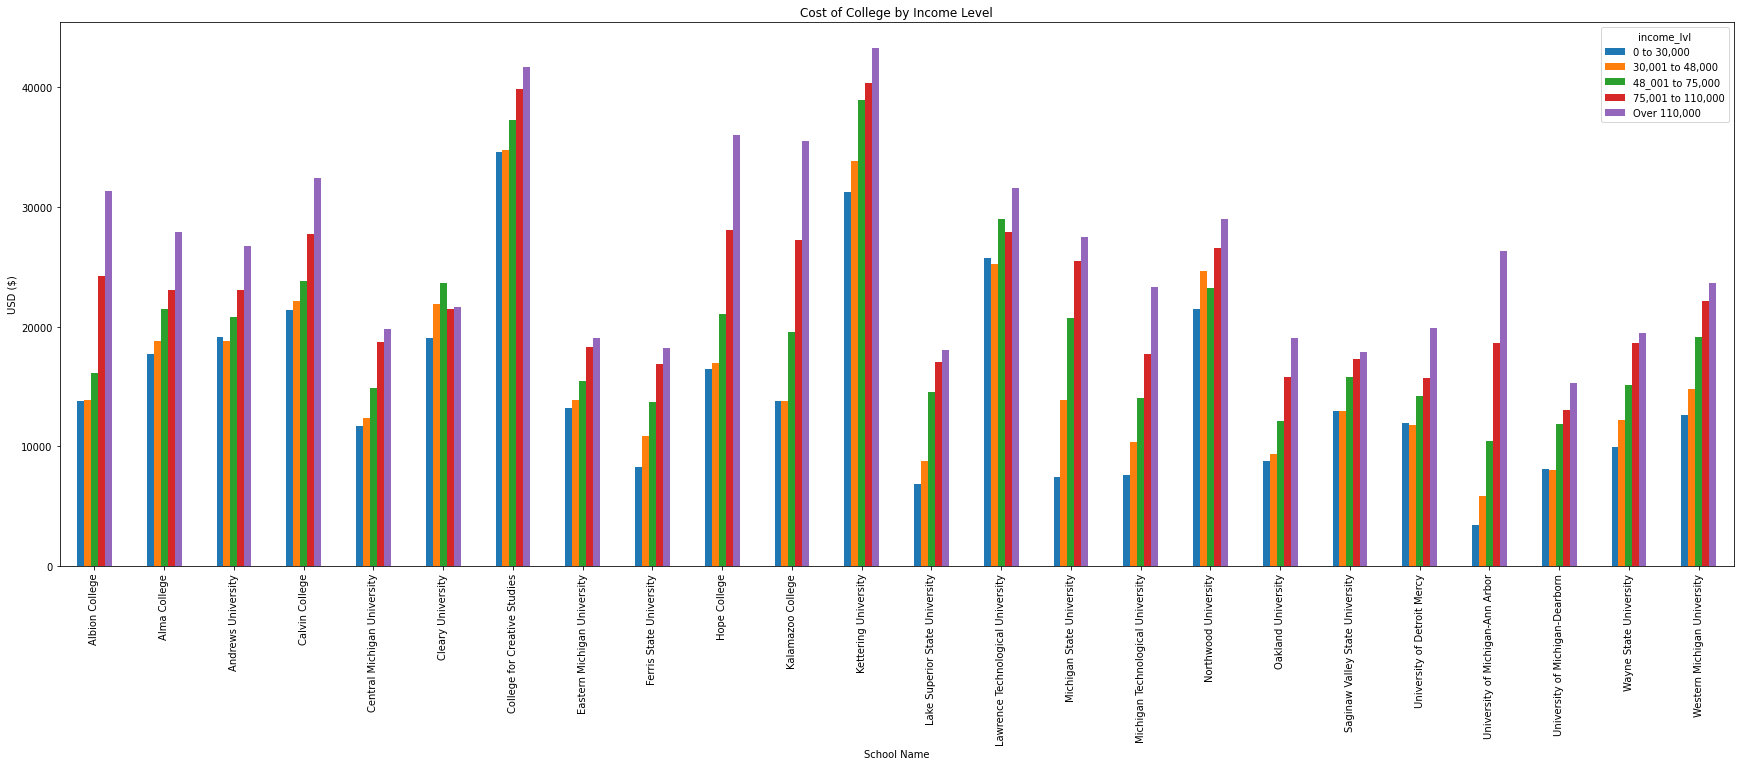

In [ ]:
michigan_tuition_income_df.reset_index().pivot_table(index='income_lvl', columns='name', values='net_cost').T.plot(kind='bar', stacked=False, figsize=(30, 10), title='Cost of College by Income Level', xlabel='School Name', ylabel='USD ($)')

# College Diversification

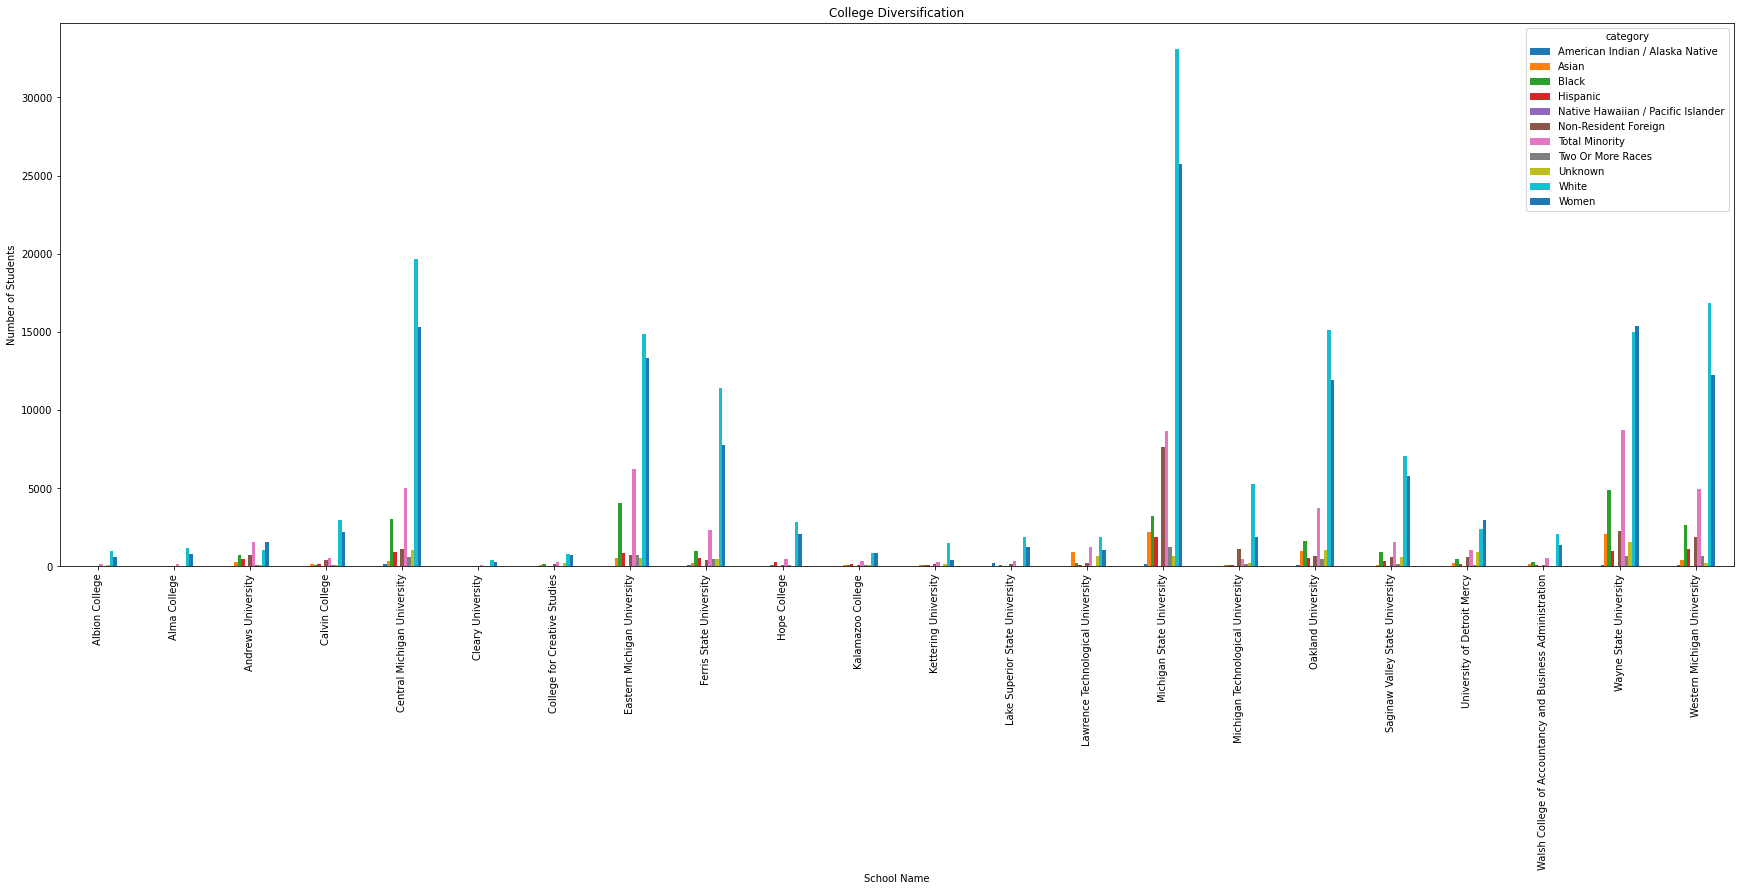

In [ ]:
michgan_school_diversity_df.reset_index().pivot_table(index='category', columns='name', values='enrollment').T.plot(kind='bar', stacked=False, figsize=(30, 10), title='College Diversification', xlabel='School Name', ylabel='Number of Students')

# Early and Mid Career Pay based on College




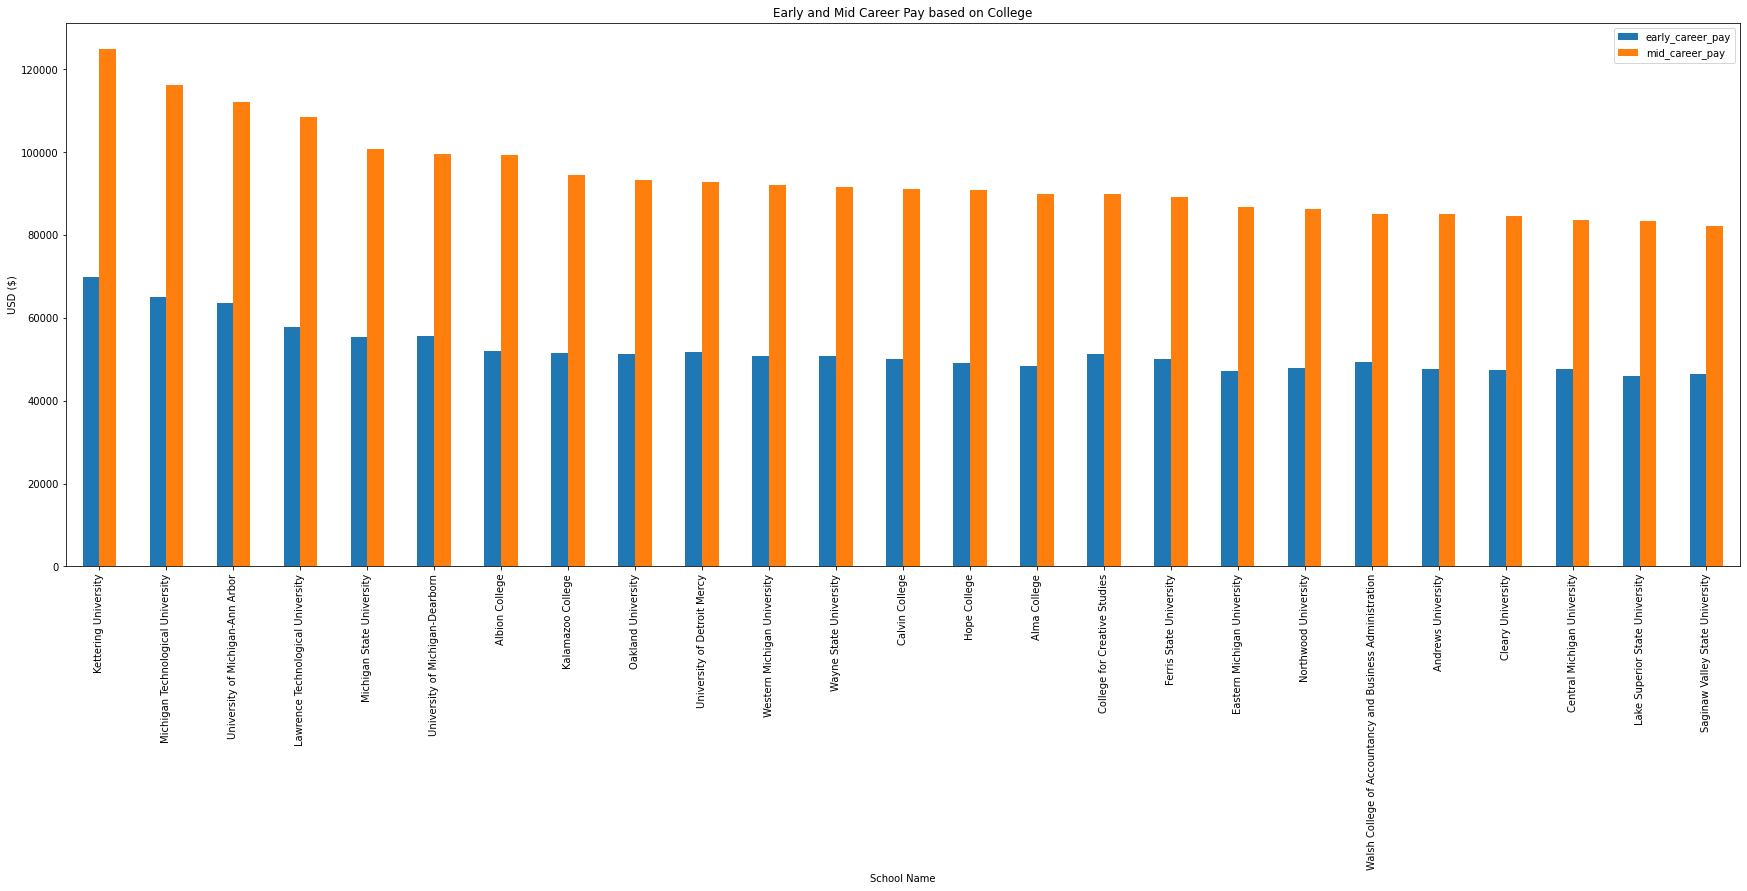

In [ ]:
michigan_salary_potential_df
michigan_salary_potential_df.plot(x="name", y=['early_career_pay', 'mid_career_pay'], kind="bar", figsize=(30,10), title='Early and Mid Career Pay based on College', xlabel='School Name', ylabel='USD ($)')

# Machine Learning Model

In [ ]:
dataset = tuition_cost_df.loc[(tuition_cost_df['type'] != 'For Profit') & (tuition_cost_df['type'] != 'Other')]
dataset['type'].replace({'Public': 0, 'Private': 1}, inplace=True)
dataset = dataset[['in_state_tuition', 'in_state_total', 'out_of_state_tuition', 'out_of_state_total', 'type']]
dataset = dataset.to_numpy()
dataset

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([[ 2380,  2380,  2380,  2380,     0],
       [34850, 45200, 34850, 45200,     1],
       [ 4128, 12602, 12550, 21024,     0],
       ...,
       [ 8950, 18350, 14950, 24350,     0],
       [ 1400,  1400,  8420,  8420,     0],
       [ 5070,  5070,  9930,  9930,     0]])

In [14]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)

print("score on test: " + str(lr.score(X_test, Y_test)))
print("score on train: "+ str(lr.score(X_train, Y_train)))

score on test: 0.9336823734729494
score on train: 0.9424083769633508


# Project Report

For this project I used a kaggle dataset that was compromised of four different csv files. My goal was to find how diversity and tuition affected after gradution pay and how income played a role with the amount of tuition actually paid in the colleges within Michigan. The csv files I was using were pretty clean and didne require a ton to be done to them in order to create useful dateframes for the EDA. I created two different dataframes on tiution cost with after graduation pay and one on the diversity of the different colleges. I used the merge function in order to create these differnet dataframes. After merging I dropped the non-useful columns and any columns that had missing values. With these now clean data frames I was able to create three different bar graphs. My findings were low income students are more likely to get a larger amount of aid from larger colleges and surprisingly diversity did not play a huge part in post college pay within the colleges in Michigan.

For my machine learning model I used the original college tuition csv, which included most of the colleges within the U.S.. In order to make an effective model I got rid off all the non-tuition columns and turned private and public into 0 and 1. After cleaning the dataframe I turned it a numpy array using the tonumpy function. I used the logistic regrssion algorithm and got an accuracy of about 93%.

Overall, this project was actually really fun to do and I got to learn a little bit more about the the college system. It has always interested me so really getting to work with some data was incredibly interesting.